* **Hensikten for analyse: Overlevelsesanalyse og Cox-regresjon for pasienter som fikk operasjon etter abdominalt aortaaneurisme.
* Testdatasettet for karkirurgisk register.
* Vurderer dødelighet mellom de som fikk BMT(best medikamentell behandling)og de som ikke fikk BMT.**

In [2]:
install.packages("tidyverse")
library(tidyverse)
install.packages("readxl")
library(readxl)
install.packages("mltest")
library(mltest)
install.packages("DescTools")
library (DescTools)
install.packages("survival")
library (survival)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available (for R version 3.6.3)”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘readxl’ is not available (for R version 3.6.3)”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
list.files(path = "../input")

In [3]:
df=read_excel("../input/aaa-mors/AAAMORS.xlsx")

In [4]:
names <- c('PatientGender' ,'Alder_70','BMI_cat' ,'Diabetes','Cerebrovasculrsykdom' ,'Hjertesykdom','Røykestatus','Atrieflimmer','Lungesykdom','Hypertensjon','BMT_teller')
df[,names] <- lapply(df[,names] , factor)
head(df)

PatientGender,Alder_70,BMI_cat,Diabetes,Cerebrovasculrsykdom,Hjertesykdom,Røykestatus,LDLkolesterol,Kolesteroltotal,Atrieflimmer,Lungesykdom,Hypertensjon,Metode_Indikasjon_AAA,BMT_teller,Time,Status
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
1,1,2,1,0,1,1,3.1,5.1,0,1,1,1,1,678,0
1,1,1,0,0,1,1,1.9,3.7,0,1,1,2,1,274,0
1,2,1,0,0,1,2,1.7,3.8,1,0,1,1,1,688,0
1,2,2,0,0,1,2,1.3,3.0,0,0,1,1,1,527,0
1,1,NA,0,0,0,2,NA,NA,0,0,0,1,1,537,0
1,1,1,0,0,0,1,3.2,5.2,0,1,0,1,1,583,0


In [5]:
#create new dataset without missing data
df <- na.omit(df) 

In [6]:
install.packages('survival')
install.packages('ranger')
install.packages('ggplot2')
install.packages('dplyr')
install.packages('ggfortify')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
library(survival)
library(ranger)
library(ggplot2)
library(dplyr)
library(ggfortify)


In [9]:
install.packages('survminer')
library(survminer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggpubr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [10]:
### Kaplan-Meier Estimation (KME)
#Add survival object
df$Survobj <- with(df,
Surv(Time, Status == 1)
)
km.one <- survfit(Survobj ~1, data = df,
conf.type = "log-log")
# Result of KME
km.one
# Survival table
summary (km.one,times = c(1,30,60,90*(1:10)))


Call: survfit(formula = Survobj ~ 1, data = df, conf.type = "log-log")

      n  events  median 0.95LCL 0.95UCL 
   1427     130      NA      NA      NA 

Call: survfit(formula = Survobj ~ 1, data = df, conf.type = "log-log")

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1   1427       0    1.000 0.00000        1.000        1.000
   30   1421       6    0.996 0.00171        0.991        0.998
   60   1418       3    0.994 0.00210        0.988        0.997
   90   1414       4    0.991 0.00252        0.984        0.995
  180   1344      12    0.982 0.00350        0.974        0.988
  270   1243      11    0.974 0.00429        0.964        0.981
  360   1147      11    0.965 0.00502        0.954        0.974
  450   1049       9    0.957 0.00561        0.945        0.967
  540    943      11    0.947 0.00639        0.933        0.958
  630    836      10    0.936 0.00715        0.921        0.949
  720    747       2    0.934 0.00732        0.918        0.947
  810    649       9    0.922 0.00822        0.904        0.937
  900    561       5    0.915 0.00878        0.896        0.930

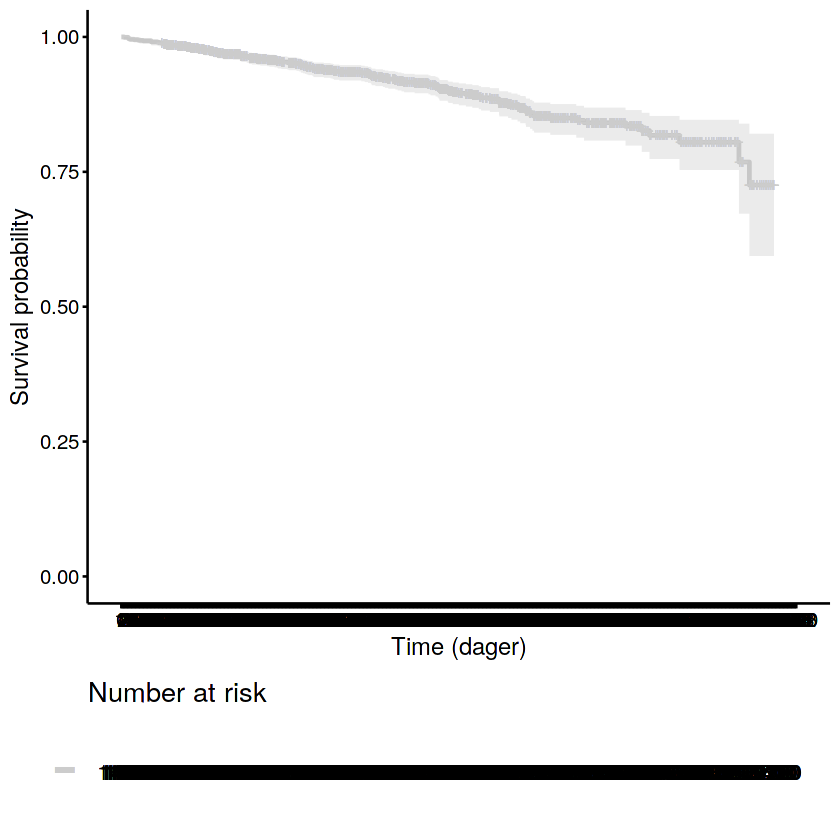

In [11]:
# Survival curve
ggsurvplot (km.one, data = df,
conf.int = TRUE,
palette = "grey",
surv.median.line = "hv",
break.time.by = 4,
censor = TRUE,
legend = "none",
xlab = "Time (dager)",
risk.table = TRUE,
tables.height = 0.2,
tables.theme = theme_cleantable(),
risk.table.y.text = FALSE
)

In [12]:
#To begin our analysis, we use the formula Surv(futime, status) ~ 1 and the survfit() function to produce the Kaplan-Meier estimates of the probability of survival over time. The times parameter of the summary() function gives some control over which times to print. 
# Here, it is set to print the estimates for 1, 30, 60 and 90 days, and then every 90 days thereafter. This is the simplest possible model.
km_fit <- survfit(Surv(Time, Status) ~ 1, data=df)
summary(km_fit, times = c(1,30,60,90*(1:10)))

Call: survfit(formula = Surv(Time, Status) ~ 1, data = df)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1   1427       0    1.000 0.00000        1.000        1.000
   30   1421       6    0.996 0.00171        0.992        0.999
   60   1418       3    0.994 0.00210        0.990        0.998
   90   1414       4    0.991 0.00252        0.986        0.996
  180   1344      12    0.982 0.00350        0.976        0.989
  270   1243      11    0.974 0.00429        0.966        0.982
  360   1147      11    0.965 0.00502        0.955        0.975
  450   1049       9    0.957 0.00561        0.946        0.968
  540    943      11    0.947 0.00639        0.934        0.959
  630    836      10    0.936 0.00715        0.922        0.950
  720    747       2    0.934 0.00732        0.919        0.948
  810    649       9    0.922 0.00822        0.906        0.938
  900    561       5    0.915 0.00878        0.898        0.932

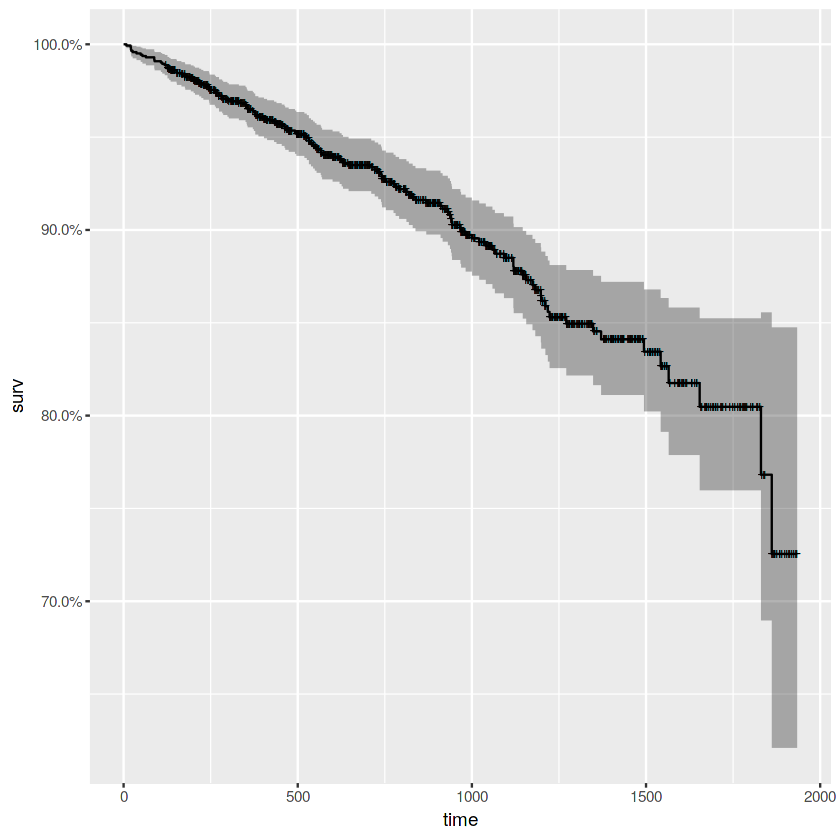

In [13]:
#plot(km_fit, xlab="Days", main = 'Kaplan Meyer Plot') #base graphics is always ready
autoplot(km_fit)

In [14]:
### KME by BMT
km.BMT <- survfit (Survobj ~ BMT_teller,
data = df,
conf.type = "log-log"
)
# Result of KME by BMT
km.BMT

Call: survfit(formula = Survobj ~ BMT_teller, data = df, conf.type = "log-log")

                n events median 0.95LCL 0.95UCL
BMT_teller=0  271     43     NA    1830      NA
BMT_teller=1 1156     87     NA      NA      NA

****KM kurve for BMT:****

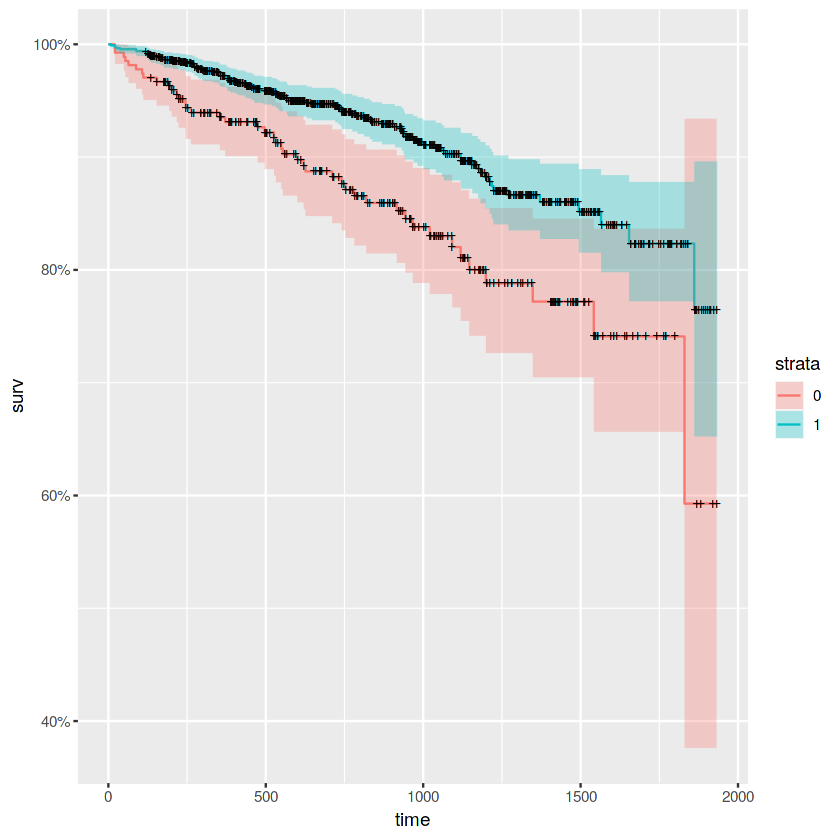

In [15]:
km_BMT_fit <- survfit(Surv(Time, Status) ~ BMT_teller, data=df)
autoplot(km_BMT_fit)

In [16]:
# Survival table of KME by BMT
summary (km.BMT)
# KM estimation, log-rank test
survdiff ( formula = Surv(Time, Status == 1)
~ BMT_teller,
data = df)

Call: survfit(formula = Survobj ~ BMT_teller, data = df, conf.type = "log-log")

                BMT_teller=0 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   20    271       1    0.996 0.00368        0.974        0.999
   21    270       1    0.993 0.00520        0.971        0.998
   49    269       1    0.989 0.00636        0.966        0.996
   54    268       1    0.985 0.00733        0.961        0.994
   64    267       1    0.982 0.00817        0.956        0.992
   88    266       1    0.978 0.00894        0.951        0.990
  107    265       1    0.974 0.00964        0.947        0.988
  111    264       1    0.970 0.01028        0.942        0.985
  153    262       1    0.967 0.01089        0.937        0.983
  193    255       1    0.963 0.01149        0.932        0.980
  201    252       1    0.959 0.01206        0.927        0.977
  217    248       1    0.955 0.01262        0.923        0.974
  223    246       1    0.951 0.01315        0.918       

Call:
survdiff(formula = Surv(Time, Status == 1) ~ BMT_teller, data = df)

                N Observed Expected (O-E)^2/E (O-E)^2/V
BMT_teller=0  271       43     26.7      9.93      12.5
BMT_teller=1 1156       87    103.3      2.57      12.5

 Chisq= 12.5  on 1 degrees of freedom, p= 4e-04 

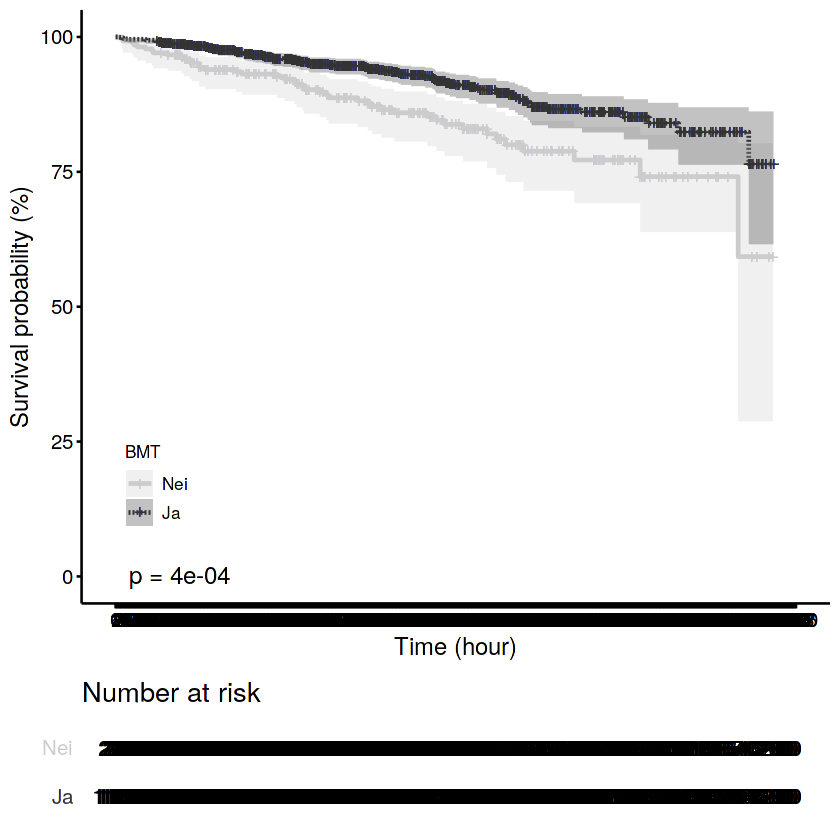

In [17]:
# Survival curve of BMT, en alternative.
ggsurvplot ( km.BMT, data = df,
fun = "pct", pval = TRUE,
conf.int = TRUE, surv.median.line = "hv",
linetype = "strata", palette = "grey",
xlab="Time (hour)",
legend.title = "BMT",
legend.labs = c("Nei", "Ja"),
legend = c(.1, .2), break.time.by = 4,
risk.table = TRUE,
tables.height = 0.2,
tables.theme = theme_cleantable(),
risk.table.y.text.col = TRUE,
risk.table.y.text = TRUE
)

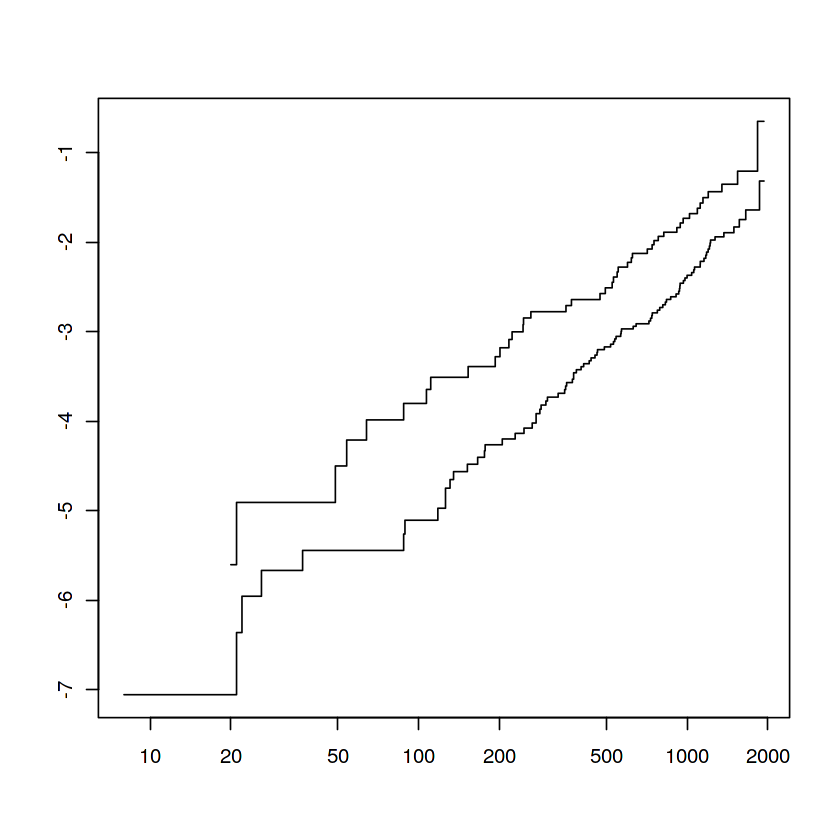

In [18]:
# LML plot:Log minus log plot of Kaplan–Meier estimation with log-rank test between BMT. 
# The two curves do not meet during the observation period, indicating the satisfaction of the proportional hazard assumption. 
# The log-time scale is shown in the x-axis.
plot (survfit(Surv(Time, Status == 1) ~ BMT_teller,
data = df), fun = "cloglog")

In [19]:
# Univariate Cox proportional hazard model
# for a single covariate
#The second method for validating a proportional hazard assumption is a GOF test between the observed and estimated survival function values. 
#This provides a P value and hence is a more objective method than a visual check: Schoenfeld residual test 
cph.BMT <- coxph(Surv(Time, Status == 1) ~ relevel(BMT_teller, ref = "1")
, data = df)
summary(cph.BMT)

Call:
coxph(formula = Surv(Time, Status == 1) ~ relevel(BMT_teller, 
    ref = "1"), data = df)

  n= 1427, number of events= 130 

                                  coef exp(coef) se(coef)     z Pr(>|z|)    
relevel(BMT_teller, ref = "1")0 0.6488    1.9133   0.1866 3.477 0.000507 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                                exp(coef) exp(-coef) lower .95 upper .95
relevel(BMT_teller, ref = "1")0     1.913     0.5227     1.327     2.758

Concordance= 0.571  (se = 0.023 )
Likelihood ratio test= 11.1  on 1 df,   p=9e-04
Wald test            = 12.09  on 1 df,   p=5e-04
Score (logrank) test = 12.52  on 1 df,   p=4e-04


In [20]:
#change variable from numeric to factor:
names <- c('Status' ,'PatientGender' ,'Alder_70','BMI_cat' ,'Diabetes','Cerebrovasculrsykdom' ,'Hjertesykdom','Røykestatus','Atrieflimmer','Lungesykdom','Hypertensjon','BMT_teller')
df[,names] <- lapply(df[,names] , factor)
str(df)

tibble [1,427 × 17] (S3: tbl_df/tbl/data.frame)
 $ PatientGender        : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Alder_70             : Factor w/ 2 levels "1","2": 1 1 2 2 1 2 1 2 1 2 ...
 $ BMI_cat              : Factor w/ 3 levels "0","1","2": 3 2 2 3 2 1 1 3 3 1 ...
 $ Diabetes             : Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 1 1 1 ...
 $ Cerebrovasculrsykdom : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...
 $ Hjertesykdom         : Factor w/ 2 levels "0","1": 2 2 2 2 1 1 1 2 1 1 ...
 $ Røykestatus          : Factor w/ 4 levels "0","1","2","9": 2 2 3 3 2 3 3 3 2 3 ...
 $ LDLkolesterol        : num [1:1427] 3.1 1.9 1.7 1.3 3.2 2.3 1.6 2 3.6 1.7 ...
 $ Kolesteroltotal      : num [1:1427] 5.1 3.7 3.8 3 5.2 4.2 3.2 3.6 5.7 3.4 ...
 $ Atrieflimmer         : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 2 1 1 ...
 $ Lungesykdom          : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 2 1 1 2 ...
 $ Hypertensjon         : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 1 2 1 1 ..

In [21]:
# Multivariate Cox regression 
cph.full <- coxph (Surv(Time, Status == 1)
~ relevel(BMT_teller, ref = "1") + PatientGender+ Alder_70+ BMI_cat+ Diabetes +Cerebrovasculrsykdom +Hjertesykdom+ Røykestatus 
   + LDLkolesterol+ Kolesteroltotal +Atrieflimmer+ Lungesykdom + Hypertensjon 
, data = df
)
summary (cph.full)

Call:
coxph(formula = Surv(Time, Status == 1) ~ relevel(BMT_teller, 
    ref = "1") + PatientGender + Alder_70 + BMI_cat + Diabetes + 
    Cerebrovasculrsykdom + Hjertesykdom + Røykestatus + LDLkolesterol + 
    Kolesteroltotal + Atrieflimmer + Lungesykdom + Hypertensjon, 
    data = df)

  n= 1427, number of events= 130 

                                     coef exp(coef)  se(coef)      z Pr(>|z|)
relevel(BMT_teller, ref = "1")0  0.994195  2.702548  0.210224  4.729 2.25e-06
PatientGender2                  -0.355664  0.700708  0.257425 -1.382 0.167088
Alder_702                        1.164878  3.205531  0.258496  4.506 6.59e-06
BMI_cat1                        -0.708163  0.492548  0.196206 -3.609 0.000307
BMI_cat2                        -1.209042  0.298483  0.334277 -3.617 0.000298
Diabetes1                       -0.224307  0.799070  0.321581 -0.698 0.485482
Cerebrovasculrsykdom1            0.349330  1.418117  0.231700  1.508 0.131636
Hjertesykdom1                    0.318550  1.375132

In [22]:
# Schoenfeld residuals test:Checking the proportional hazards assumption
sf.residual <- cox.zph(cph.full)
print(sf.residual) # display the results


                                 chisq df       p
relevel(BMT_teller, ref = "1")  0.4250  1 0.51448
PatientGender                   1.7894  1 0.18099
Alder_70                        1.2401  1 0.26546
BMI_cat                         2.3358  2 0.31102
Diabetes                        1.2582  1 0.26199
Cerebrovasculrsykdom           14.3904  1 0.00015
Hjertesykdom                    0.1032  1 0.74806
Røykestatus                     3.2792  3 0.35054
LDLkolesterol                   0.0959  1 0.75680
Kolesteroltotal                 0.2523  1 0.61548
Atrieflimmer                    1.0408  1 0.30763
Lungesykdom                     0.6986  1 0.40325
Hypertensjon                    0.1095  1 0.74070
GLOBAL                         29.2617 16 0.02223


**The P value in indicates the significance probability of the Schoenfeld residual test for Cerebrovasculrsykdom, and such values indicate a violation of the proportional hazard assumption. **

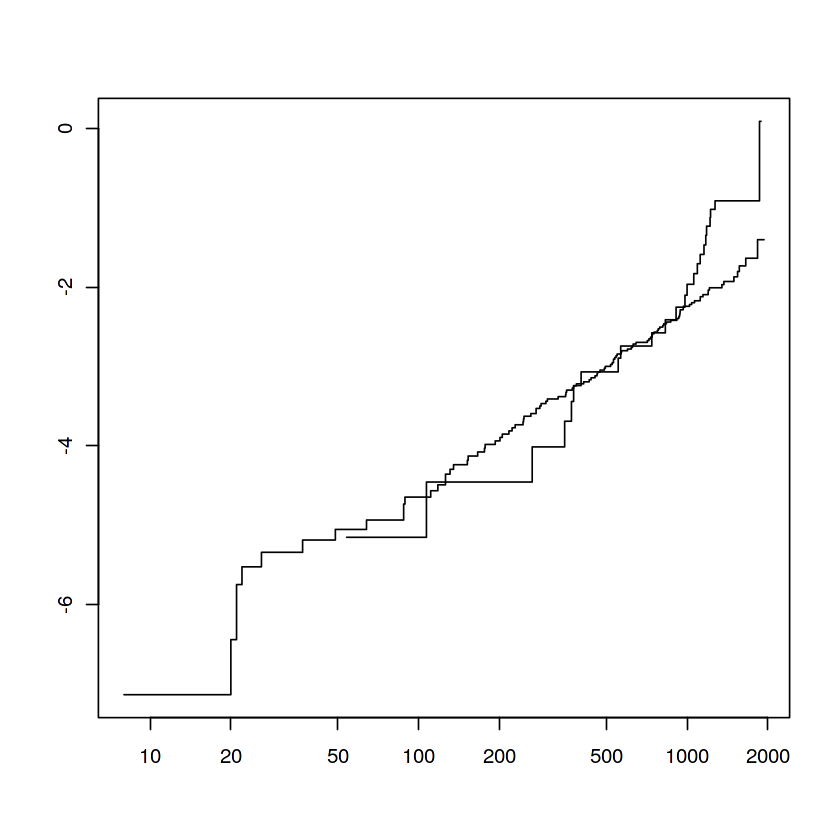

In [23]:
# LML plot:Log minus log plot of Kaplan–Meier estimation with log-rank test between Cerebrovasculrsykdom 
# The two curves meets during the observation period, indicating the unsatisfaction of the proportional hazard assumption. 
# The log-time scale is shown in the x-axis.
plot (survfit(Surv(Time, Status == 1) ~ Cerebrovasculrsykdom,
data = df), fun = "cloglog")

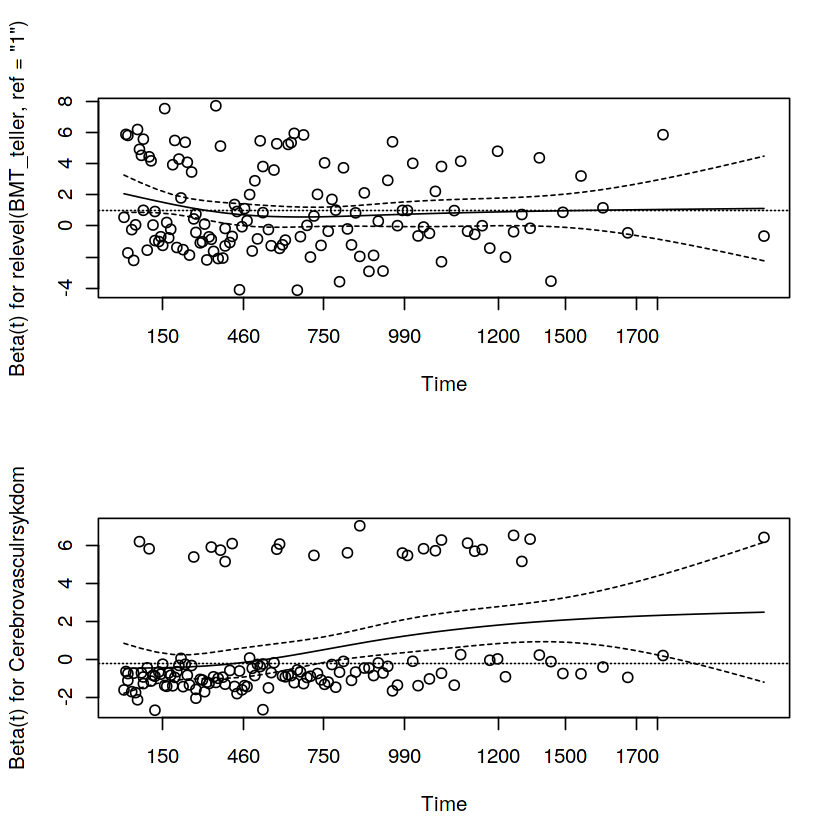

In [24]:
par (mfrow = c(2,1))
plot(sf.residual[1]) # plot curves
abline (h = coef(cph.full)[1]
, lty = "dotted", lwd = 1)
plot(sf.residual[6])
abline (h = coef(cph.full)[6]
, lty = "dotted", lwd = 1)

**if the proportional hazard assumption is not satisfied, the Aalen's additive model is an appropriate alternative for the Cox model. If the proportional hazard assumption is satisfied, both models are appropriate. Generally, the two models give different pieces of information. **
 
 fit Aalen’s additive regression model . The documentation states: “The Aalen model assumes that the cumulative hazard H(t) for a subject can be expressed as a(t) + X B(t), where a(t) is a time-dependent intercept term, X is the vector of covariates for the subject (possibly time-dependent), and B(t) is a time-dependent matrix of coefficients.”

The plots show how the effects of the covariates change over time. 

In [25]:
df$Status <- as.numeric(df$Status)
aa_fit <-aareg(Surv(Time, Status) ~ relevel(BMT_teller, 
    ref = "1") + PatientGender +
                 Alder_70 + BMI_cat + Diabetes + Cerebrovasculrsykdom+Hjertesykdom+ Røykestatus 
   + LDLkolesterol+ Kolesteroltotal +Atrieflimmer+ Lungesykdom + Hypertensjon , 
                 data = df)
aa_fit

Call:
aareg(formula = Surv(Time, Status) ~ relevel(BMT_teller, ref = "1") + 
    PatientGender + Alder_70 + BMI_cat + Diabetes + Cerebrovasculrsykdom + 
    Hjertesykdom + Røykestatus + LDLkolesterol + Kolesteroltotal + 
    Atrieflimmer + Lungesykdom + Hypertensjon, data = df)

  n= 1427 
    121 out of 123 unique event times used

                                    slope      coef se(coef)       z        p
Intercept                        3.96e-04  1.58e-03 0.000580  2.7100 6.64e-03
relevel(BMT_teller, ref = "1")0  2.44e-04  1.15e-03 0.000328  3.5100 4.47e-04
PatientGender2                  -5.96e-05 -4.38e-04 0.000262 -1.6700 9.53e-02
Alder_702                        1.93e-04  9.69e-04 0.000188  5.1400 2.70e-07
BMI_cat1                        -2.02e-04 -8.57e-04 0.000242 -3.5400 4.03e-04
BMI_cat2                        -2.44e-04 -1.05e-03 0.000261 -4.0300 5.61e-05
Diabetes1                       -7.55e-05 -2.29e-04 0.000280 -0.8190 4.13e-01
Cerebrovasculrsykdom1           -7.19e-06

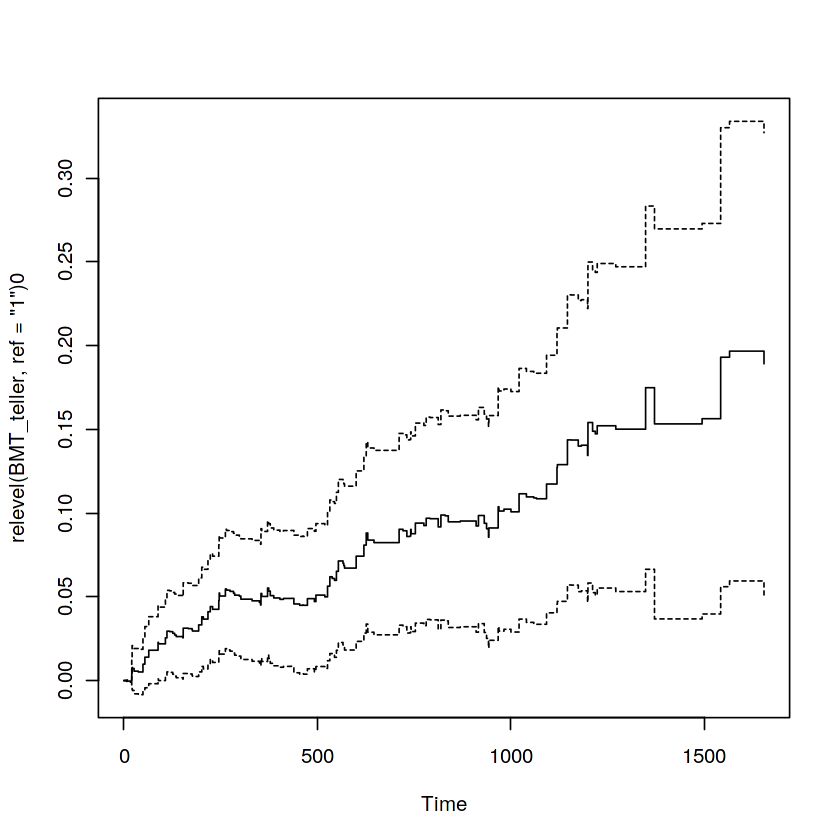

In [26]:
plot(aa_fit[2])

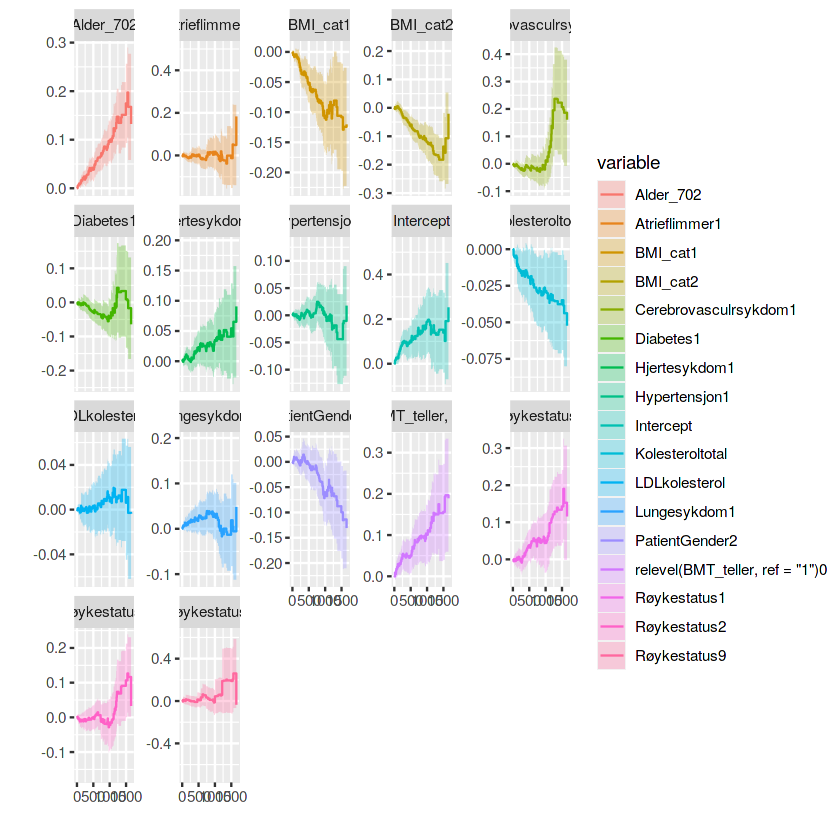

In [27]:
#summary(aa_fit)  # provides a more complete summary of results
autoplot(aa_fit)

**Cox Proportional Hazard Regression Models with Time-dependent Covariates Covariates violating the proportional hazard assumption in a CPH model should be adequately adjusted. 2 METHODS: (1)stratification (2) time-dependent Cox regression . https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6781220/

In [28]:
#To fit the CPH model with variables violating the proportional hazard assumption, one method is to apply a stratified CPH model. 
### Stratified Cox proportional hazard modeling
cph.strata <- coxph (Surv(Time, Status == 1)
~relevel(BMT_teller, ref = "1") + PatientGender+ Alder_70+ BMI_cat+ Diabetes +Hjertesykdom+ Røykestatus 
   + LDLkolesterol+ Kolesteroltotal +Atrieflimmer+ Lungesykdom + Hypertensjon +BMT_teller+ strata(Cerebrovasculrsykdom)
, data = df)
summary (cph.strata)


Call:
coxph(formula = Surv(Time, Status == 1) ~ relevel(BMT_teller, 
    ref = "1") + PatientGender + Alder_70 + BMI_cat + Diabetes + 
    Hjertesykdom + Røykestatus + LDLkolesterol + Kolesteroltotal + 
    Atrieflimmer + Lungesykdom + Hypertensjon + BMT_teller + 
    strata(Cerebrovasculrsykdom), data = df)

  n= 1427, number of events= 1297 

                                     coef exp(coef)  se(coef)      z Pr(>|z|)
relevel(BMT_teller, ref = "1")0 -0.243351  0.783996  0.078009 -3.120  0.00181
PatientGender2                  -0.003157  0.996848  0.078155 -0.040  0.96778
Alder_702                        0.057191  1.058858  0.062698  0.912  0.36168
BMI_cat1                         0.013910  1.014007  0.064440  0.216  0.82910
BMI_cat2                         0.043700  1.044669  0.080590  0.542  0.58765
Diabetes1                        0.016000  1.016129  0.089626  0.179  0.85831
Hjertesykdom1                   -0.088455  0.915345  0.059183 -1.495  0.13502
Røykestatus1                 

In [29]:
# Test the proportional hazards assumption for a Cox regression model fit (coxph). 
sf.residual.strata <- cox.zph(cph.strata)
print(sf.residual.strata)

                                 chisq df     p
relevel(BMT_teller, ref = "1")  3.9866  1 0.046
PatientGender                   0.5070  1 0.476
Alder_70                        0.0101  1 0.920
BMI_cat                         1.7527  2 0.416
Diabetes                        0.0578  1 0.810
Hjertesykdom                    0.0883  1 0.766
Røykestatus                     4.3190  3 0.229
LDLkolesterol                   0.0157  1 0.900
Kolesteroltotal                 4.4161  1 0.036
Atrieflimmer                    0.4795  1 0.489
Lungesykdom                     0.5135  1 0.474
Hypertensjon                    0.0115  1 0.915
GLOBAL                         20.1149 15 0.168


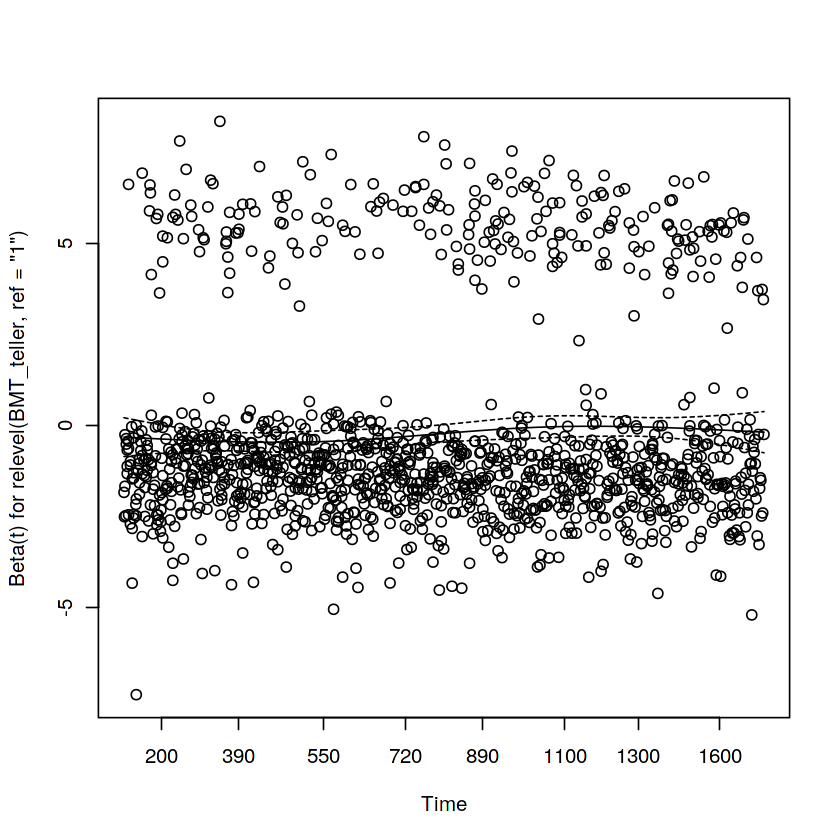

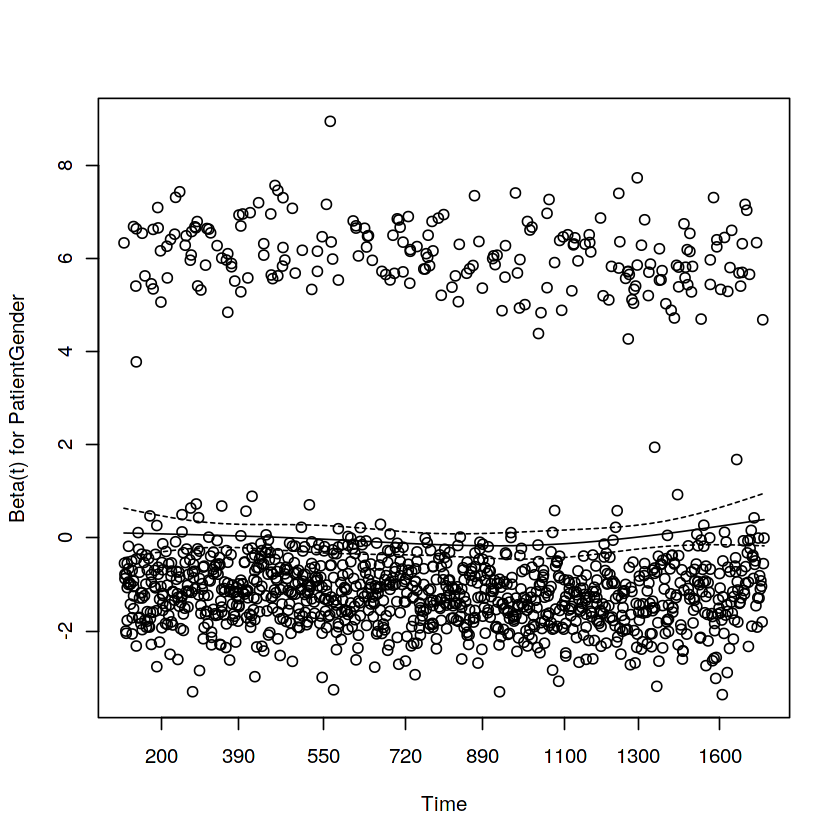

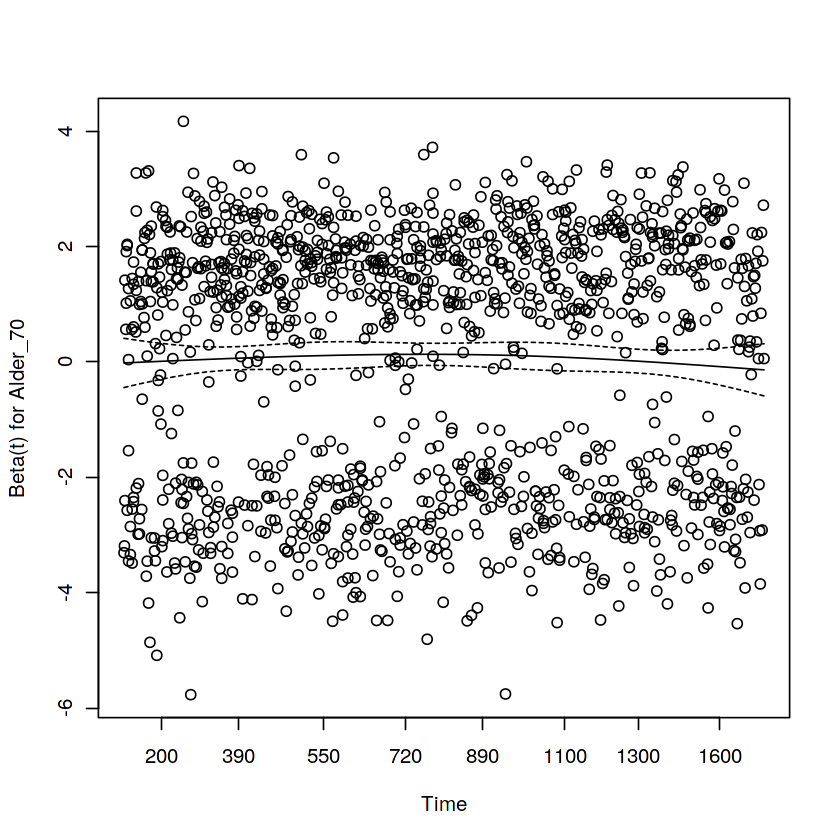

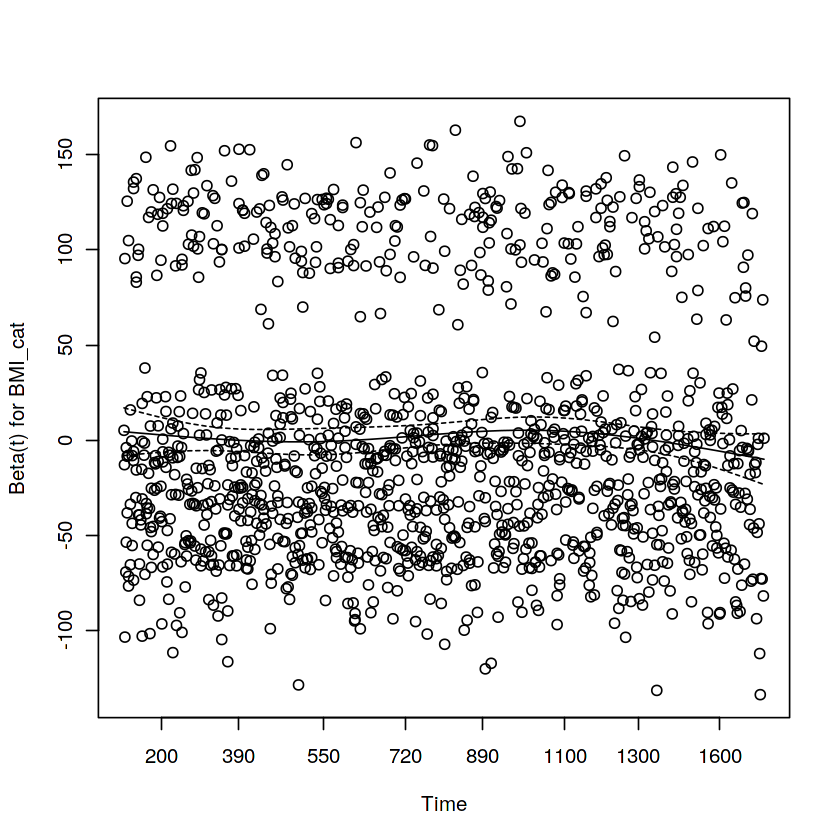

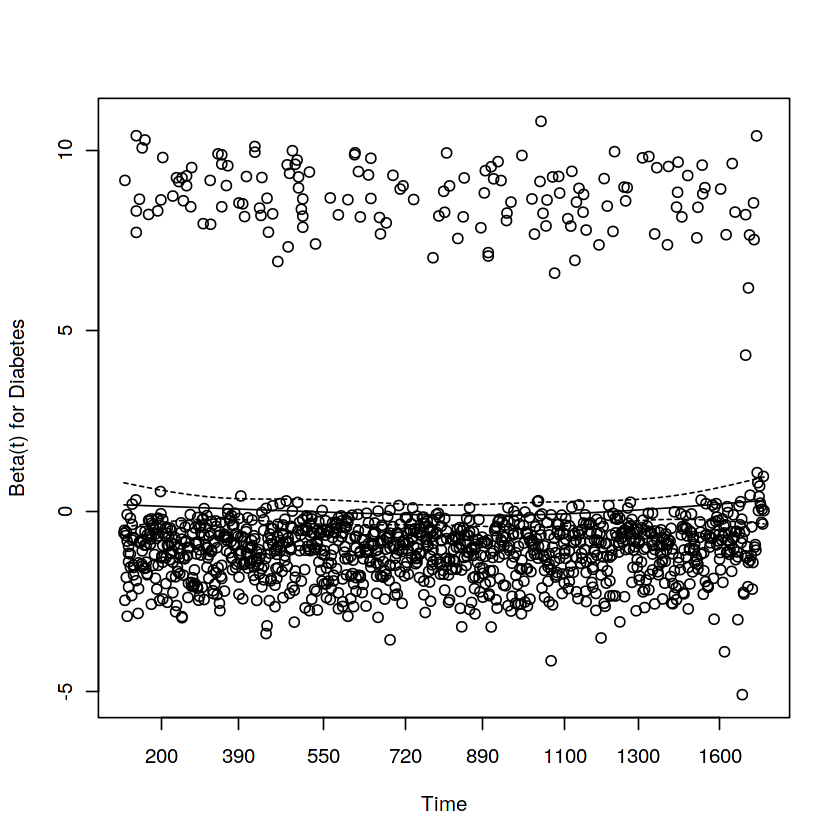

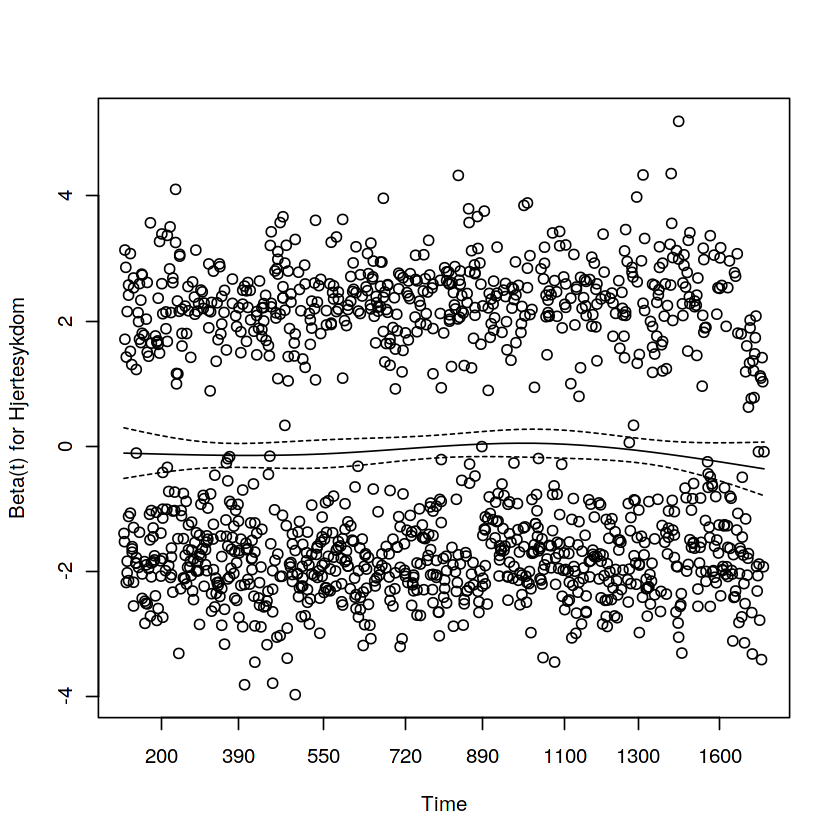

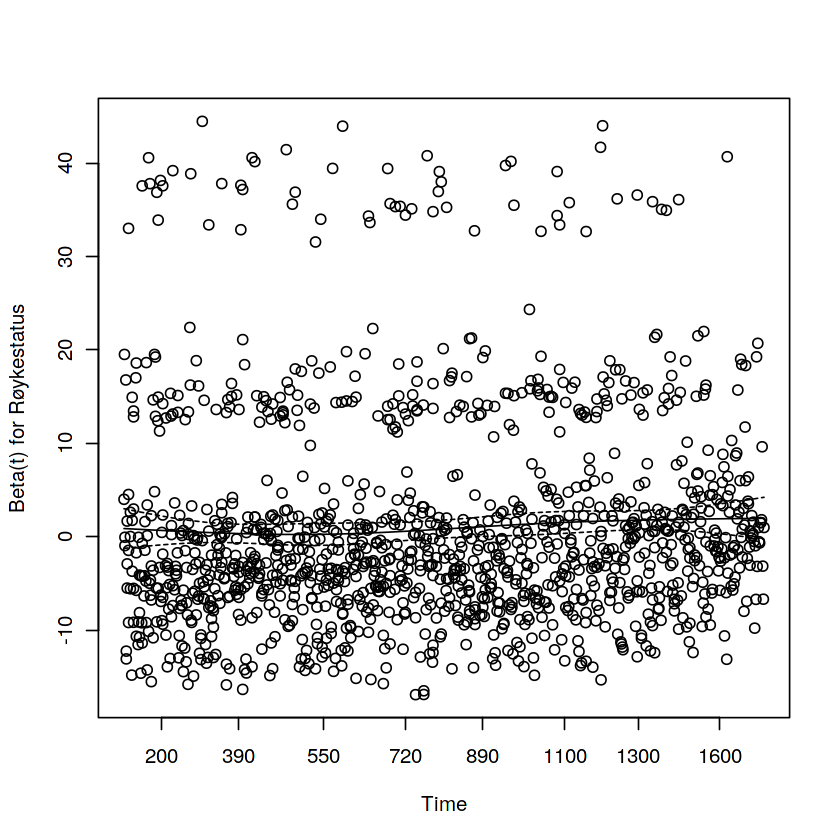

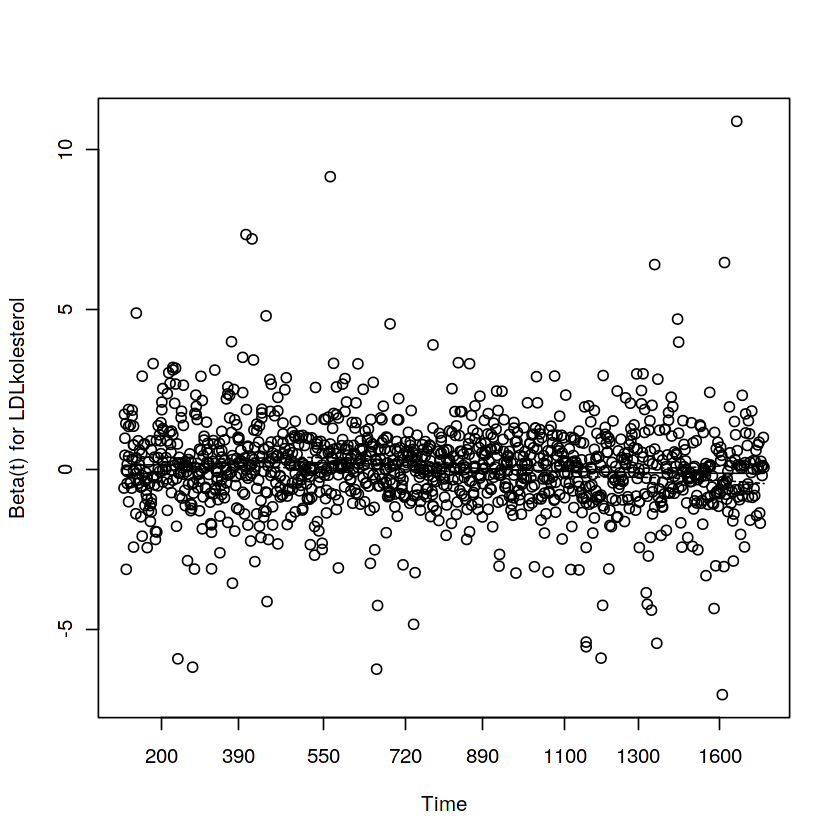

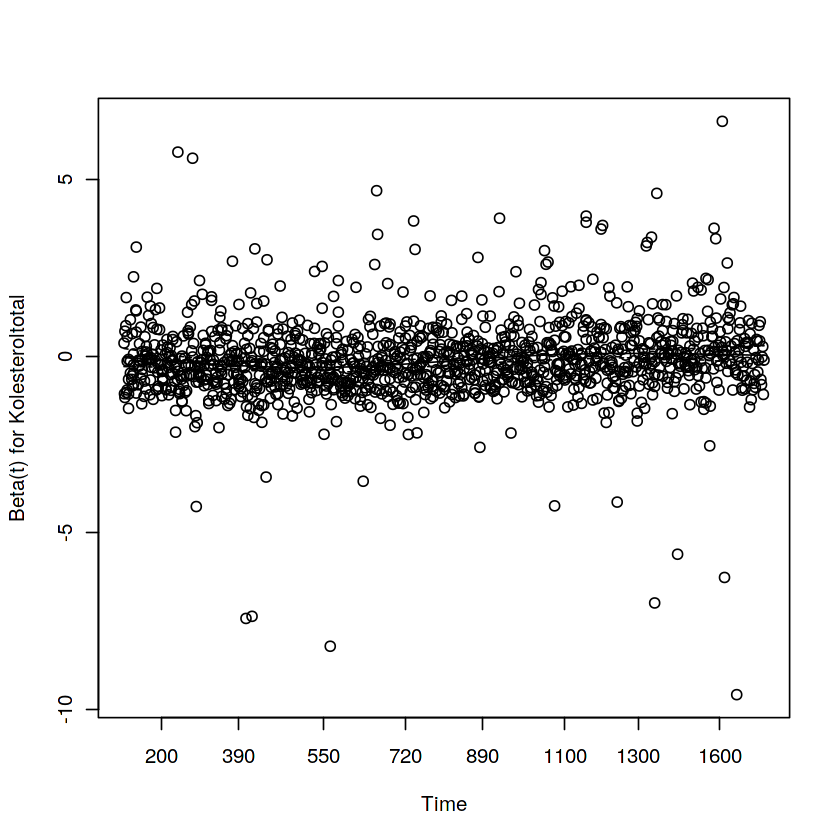

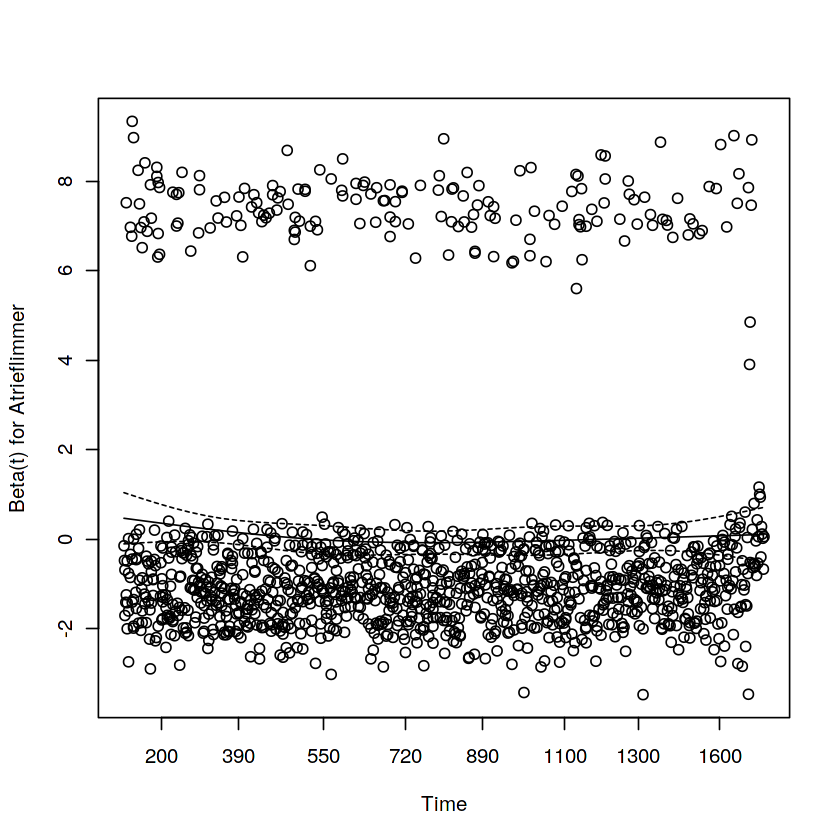

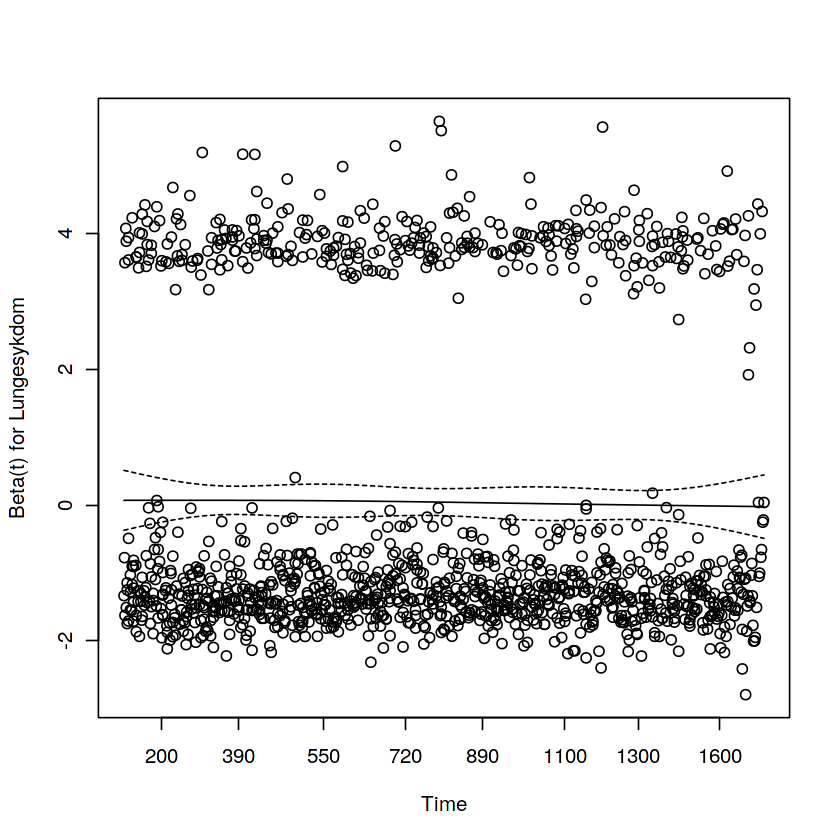

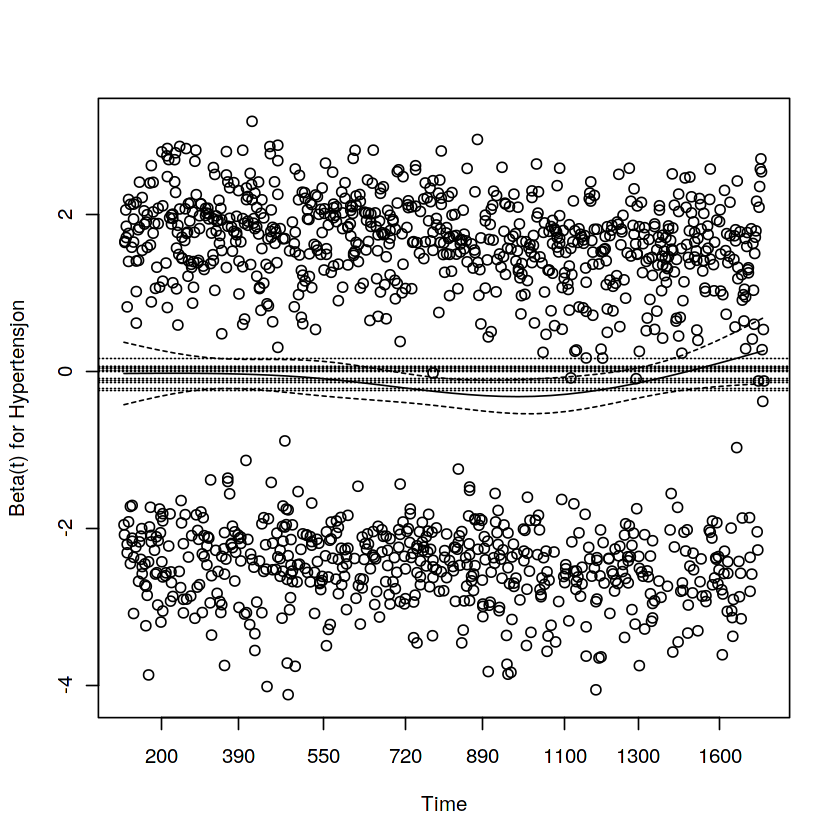

In [30]:
sf.residual.strata <- cox.zph(cph.strata)
plot(sf.residual.strata)

abline (h = coef(cph.strata)

, lty = "dotted"

, lwd = 1)

**Quantifying predictive accuracy in Cox models: n: Overall, how well can a given model predict survival?
**
* Concordance, or synonymously the C-statistic, is a valuable measure of model discrimination in analyses involving survival time data.
* In general, consider selecting random pairs of patients, and for each pair note whether the model correctly predicts order, e.g., a higher model score for the better result. Concordance is then the fraction of pairs for which the model is correct.
* A completely random prediction would have a concordance of 0.5, aperfect rule a concordance of 1.


**Concordance is interpreted as follows:
* Random Predictions: 0.5
* Perfect Concordance: 1.0
* Perfect Anti-Concordance: 0.0 (in this case we should multiply the predictions by -1 to get a perfect 1.0)
Usually, the fitted models have a concordance index between **0.55 and 0.7 **which is due to the noise present in the data.**

In [31]:
 concordance(cph.strata)

Call:
concordance.coxph(object = cph.strata)

n= 1427 
Concordance= 0.5648 se= 0.009461
     concordant discordant tied.x tied.y tied.xy
[1,]     394193     303136      7    691       1
[2,]       6943       5987      1     12       0

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.550570 -0.111721  0.001311  0.000000  0.108355  0.649911 

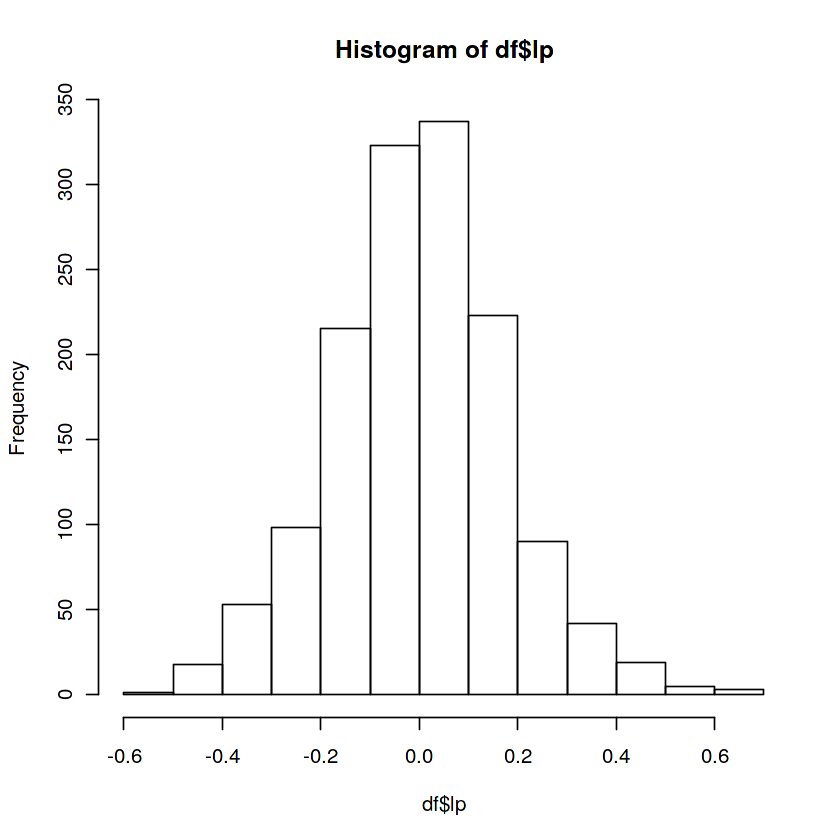

In [32]:

#use the predict() function for making prediction score from modults of model-fitting functions
df <- na.omit(df) # removed missing values 
df$lp <- predict(cph.strata, data=df)
summary (df$lp)
hist(df$lp)

In [33]:
install.packages("pROC")
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Setting levels: control = 1, case = 2

Setting direction: controls > cases



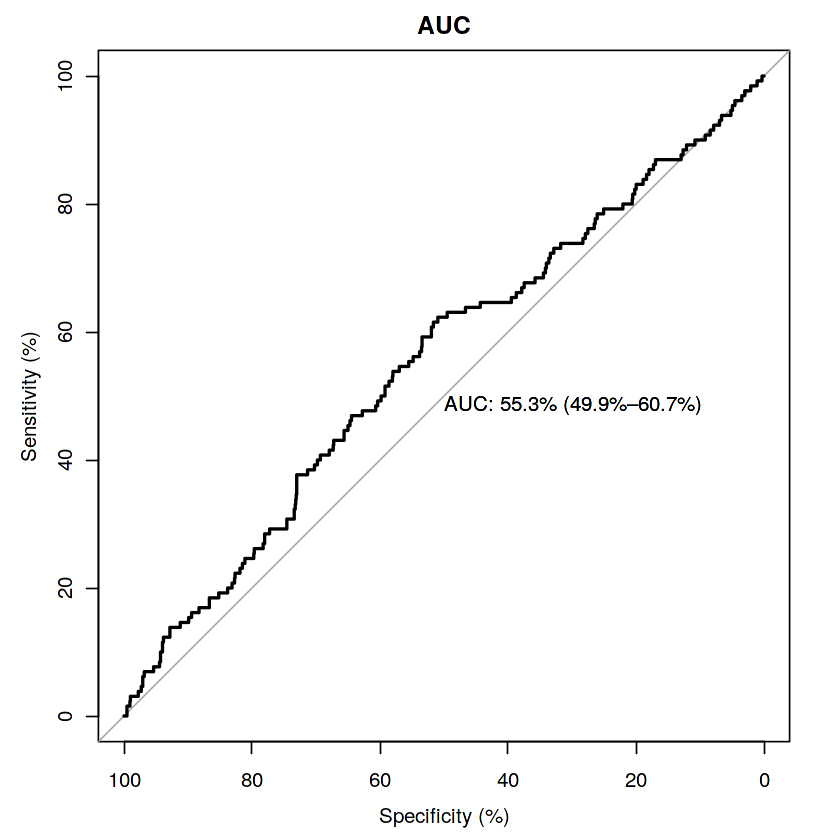

In [34]:
rocobj <- plot.roc(df$Status,df$lp,
                   main = "AUC", 
                   percent=TRUE,
                   ci = TRUE,                  # compute AUC (of AUC by default)
                   print.auc = TRUE)   

Setting levels: control = 1, case = 2

Setting direction: controls > cases



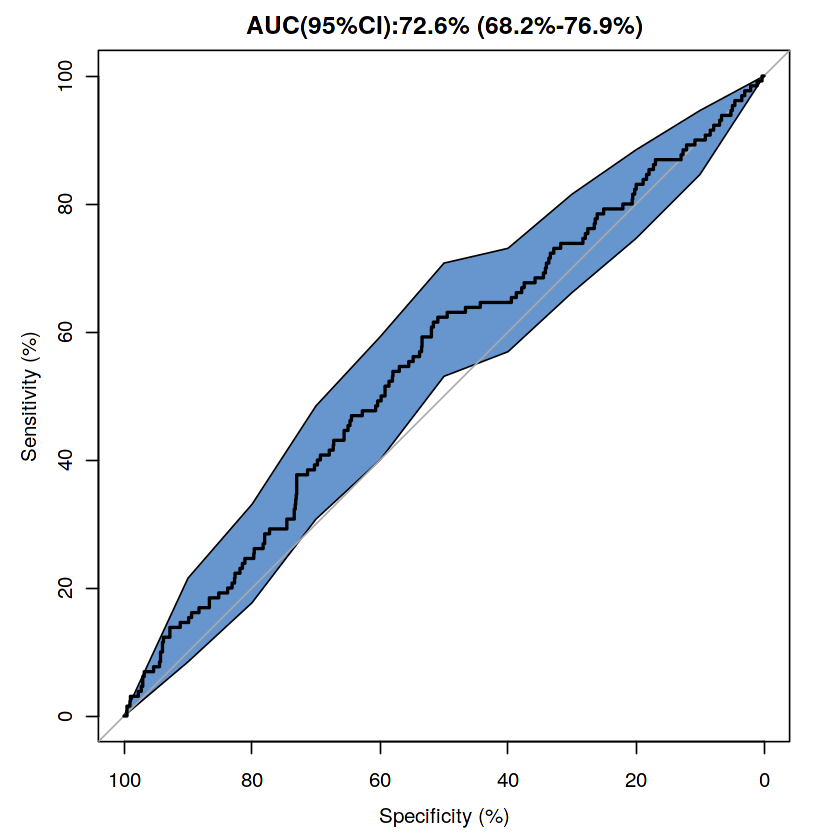

In [35]:
rocobj <- plot.roc(df$Status,df$lp,
                   main = "AUC(95%CI):72.6% (68.2%-76.9%)", 
                   percent = TRUE,
                   ci = TRUE, 
                   of = "se",                                # ci of sensitivity
                 ci.type="shape", 
                   ci.col="#1c61b6AA")  


******time-dependent coefficient Cox regression model: step function**
The command ‘survSplit’ separates the patient data according to the established time interval, where the value for each interval is the measured value on the left side of the interval (start time, ‘tstart’), and ‘Time,’ which is the end of the interval succeeds the next interval. That is, one interval is closed at the left and opened at the right, and if an event occurs during the interval, the survival function is estimated using the variables measured at the left side of the interval